<a href="https://colab.research.google.com/github/Tharungoud21/Hate_speech_detection_using_X_Data/blob/main/major_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving labeled_data.csv.csv to labeled_data.csv.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['labeled_data.csv.csv']))
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                             

In [ ]:
df['text length'] = df['tweet'].apply(len)
print(df.tail())

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  text length  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...          146  
24779  you've gone and broke the wrong heart baby, an...           70  
24780  young buck wanna eat!!.. dat nigguh like I ain...           67  
24781              youu got wild bitches tellin you lies           37  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...          127  


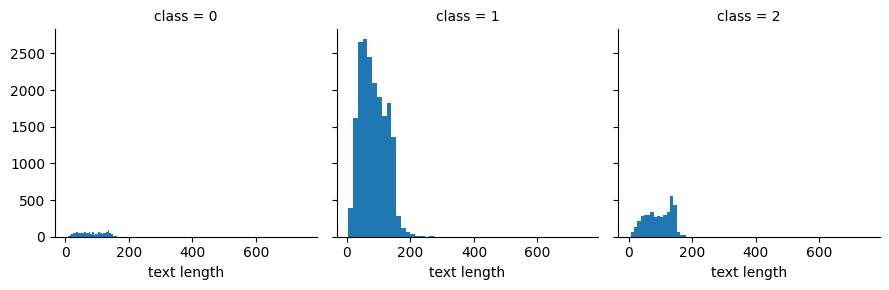

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df,col='class')
graph.map(plt.hist,'text length',bins=50)

<Axes: xlabel='class', ylabel='text length'>

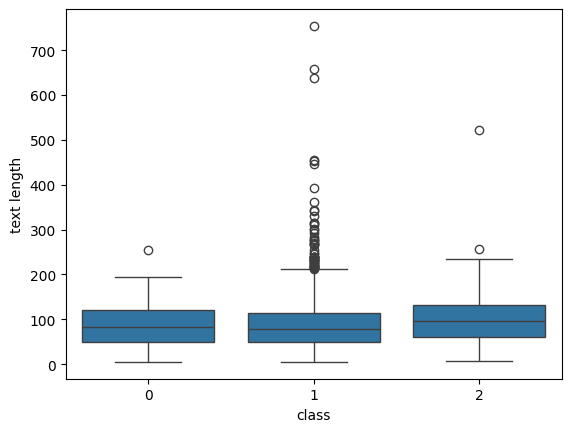

In [ ]:
sns.boxplot(x='class',y='text length', data=df)

<Axes: >

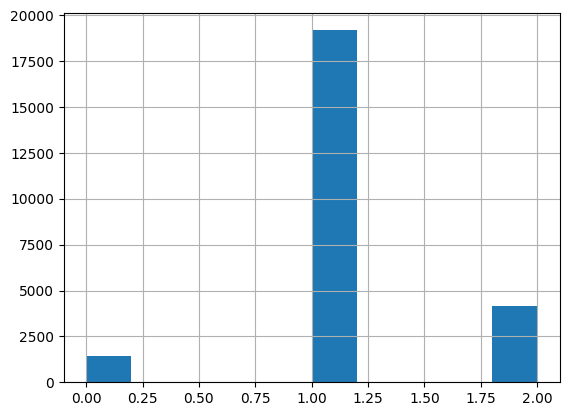

In [ ]:
df['class'].hist()

In [ ]:
df['lables'] = df['class'].map({0:"hate speech detected",1:"offencive language detected",2:"no hate and no offencive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  \
0  !!! RT @mayasolovely: As a woman you shouldn't...          140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137   

                            lables  
0  no hate and no offencive speech  
1      offencive language detected  
2      offencive language detected 

In [ ]:
df=df[['tweet','lables']]
df.head()

,tweet,lables
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate and no offencive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offencive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offencive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offencive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offencive language detected


In [ ]:
def clean(text):
  text=str(text).lower()
  text= re.sub('\[.*?\]','',text)
  text=re.sub('https?;//\S+|www\.\s+','',text)
  text= re.sub('<.?>+','',text)
  text= re.sub('[%s]'% re.escape (string.punctuation),'',text)
  text= re.sub('\n','',text)
  text= re.sub('\w*\d\w*','',text)
  text= [word for word in text.split(' ') if word not in stopword]
  text= " ".join(text)
  text= [stemmer. stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

df["tweet"] = df ["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                            lables  
0  no hate and no offencive speech  
1      offencive language detected  
2      offencive language detected  
3      offencive language detected  
4      offencive language detected  


<ipython-input-12-90b4797973c3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df ["tweet"].apply(clean)


In [ ]:
x = np.array(df["tweet"])
y=np.array(df["lables"])
cv=CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.33,random_state=42)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

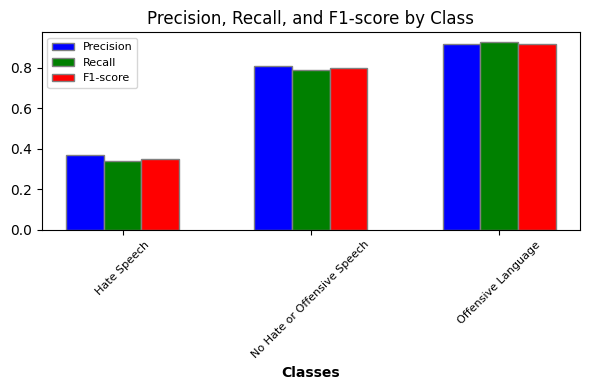

Decision tree, Accuracy Score: 0.8708888617190366


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

precision = [0.37, 0.81, 0.92]
recall = [0.34, 0.79, 0.93]
f1_score = [0.35, 0.80, 0.92]
classes = ['Hate Speech', 'No Hate or Offensive Speech', 'Offensive Language']

bar_width = 0.2

r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(6, 4))

plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

plt.xlabel('Classes', fontweight='bold', fontsize=10)
plt.xticks([r + bar_width for r in range(len(precision))], classes, rotation=45, fontsize=8)

plt.legend(loc='upper left', fontsize=8)
plt.title('Precision, Recall, and F1-score by Class', fontsize=12)
plt.tight_layout()
plt.show()

print("Decision tree, Accuracy Score:", 0.8708888617190366)


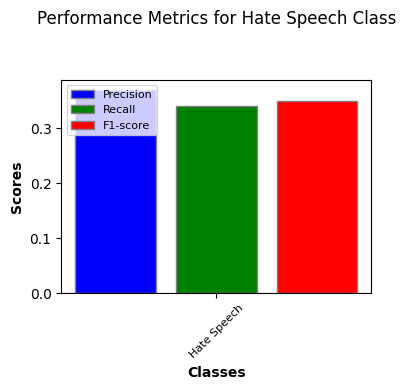

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
precision = [0.37]
recall = [0.34]
f1_score = [0.35]
classes = ['Hate Speech']

bar_width = 0.2  # Decreased bar width for each metric
r = np.arange(len(precision))

# Plot
plt.figure(figsize=(4, 4))

plt.bar(r, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r + bar_width + 0.05, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')  # Adjusted position for recall
plt.bar(r + 2*(bar_width + 0.05), f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')  # Adjusted position for F1-score

plt.xlabel('Classes', fontweight='bold', fontsize=10)  # Changed x-axis label to Metrics
plt.ylabel('Scores', fontweight='bold', fontsize=10)  # Changed y-axis label to Scores
plt.title('Performance Metrics for Hate Speech Class', fontsize=12, pad=40)  # Added padding to the title
plt.xticks([r + bar_width + 0.05 for r in range(len(precision))], classes, rotation=45, fontsize=8)

plt.legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


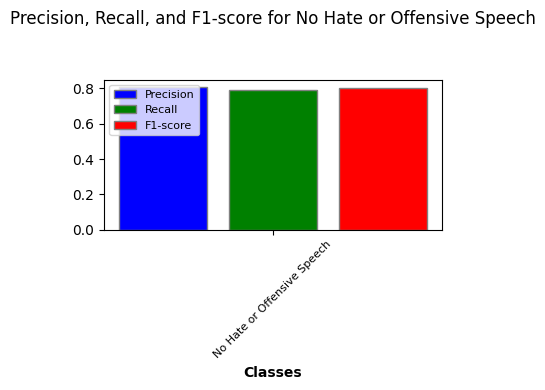

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
precision = [0.81]
recall = [0.79]
f1_score = [0.80]
classes = ['No Hate or Offensive Speech']

bar_width = 0.2  # Decreased bar width for each metric
r = np.arange(len(precision))

# Plot
plt.figure(figsize=(4, 4))

plt.bar(r, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r + bar_width + 0.05, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')  # Adjusted position for recall
plt.bar(r + 2*(bar_width + 0.05), f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')  # Adjusted position for F1-score

plt.xlabel('Classes', fontweight='bold', fontsize=10)
plt.xticks([r + bar_width + 0.05 for r in range(len(precision))], classes, rotation=45, fontsize=8)

plt.legend(loc='upper left', fontsize=8)
plt.title('Precision, Recall, and F1-score for No Hate or Offensive Speech', fontsize=12,pad=40)
plt.tight_layout()
plt.show()


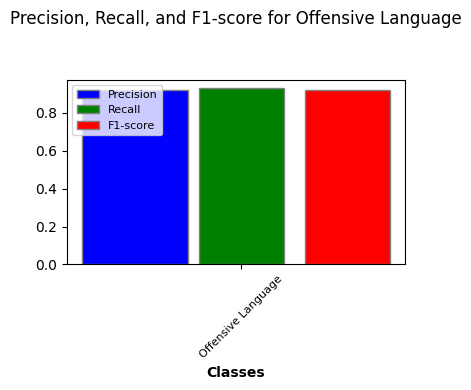

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
precision = [0.92]
recall = [0.93]
f1_score = [0.92]
classes = ['Offensive Language']

bar_width = 0.2
r = np.arange(len(precision))

# Plot
plt.figure(figsize=(4, 4))

plt.bar(r, precision, color='b', width=bar_width+0.05, edgecolor='grey', label='Precision')
plt.bar(r + bar_width+0.05, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r + 2*(bar_width+0.05), f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

plt.xlabel('Classes', fontweight='bold', fontsize=10)
plt.xticks([r + bar_width+0.05 for r in range(len(precision))], classes, rotation=45, fontsize=8)

plt.legend(loc='upper left', fontsize=8)
plt.title('Precision, Recall, and F1-score for Offensive Language', fontsize=12,pad=40)
plt.tight_layout()
plt.show()


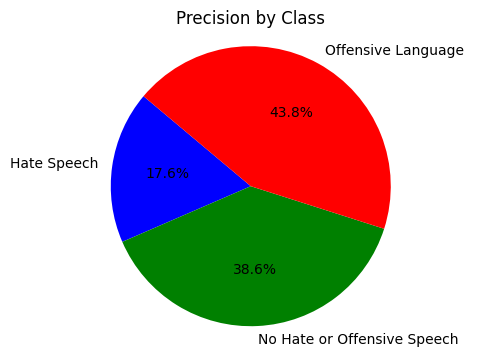

Decision tree, Accuracy Score: 0.8708888617190366


In [ ]:
#for better understanding plotting pie chart
import matplotlib.pyplot as plt

precision = [0.37, 0.81, 0.92]
recall = [0.34, 0.79, 0.93]
f1_score = [0.35, 0.80, 0.92]
classes = ['Hate Speech', 'No Hate or Offensive Speech', 'Offensive Language']

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(precision, labels=classes, autopct='%1.1f%%', startangle=140, colors=['b', 'g', 'r'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Precision by Class')

plt.show()

print("Decision tree, Accuracy Score:", 0.8708888617190366)





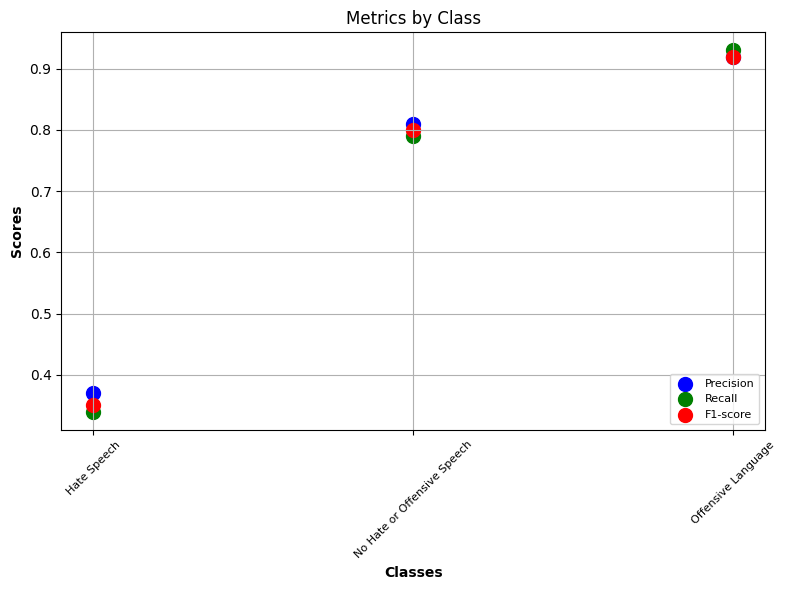

Decision tree, Accuracy Score: 0.8708888617190366


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

precision = [0.37, 0.81, 0.92]
recall = [0.34, 0.79, 0.93]
f1_score = [0.35, 0.80, 0.92]
classes = ['Hate Speech', 'No Hate or Offensive Speech', 'Offensive Language']

# Create an array of indices for classes
indices = np.arange(len(classes))

# Set up the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(indices, precision, color='b', label='Precision', s=100)
plt.scatter(indices, recall, color='g', label='Recall', s=100)
plt.scatter(indices, f1_score, color='r', label='F1-score', s=100)

# Add labels and title
plt.xlabel('Classes', fontweight='bold', fontsize=10)
plt.ylabel('Scores', fontweight='bold', fontsize=10)
plt.xticks(indices, classes, rotation=45, fontsize=8)
plt.title('Metrics by Class', fontsize=12)

# Add legend
plt.legend(loc='lower right', fontsize=8)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
print("Decision tree, Accuracy Score:", 0.8708888617190366)


In [ ]:
test_data="i will kill you"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['hate speech detected']


In [ ]:
test_data="you are awesome"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['no hate and no offencive speech']


In [ ]:
test_data="you are too bad and i dont like your attitude"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['offencive language detected']
